<center><h1>Assingment IV</h1><center>
<h3>Taha Bouhoun<h3>

In [24]:
# Importing packages

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as sts
from PIL import Image

%matplotlib inline

---

### POSTERIOR PREDICTIVE TEST
- Refer back to the medical trial pre-class work notebook from Session 8.1. The notebook contains a non-hierarchical model (first) and a hierarchical model (second). For the non-hierarchical model and the control group half of the data set, choose a test statistic to show that the non-hierarchical model does not explain the control group data well. You should generate posterior data samples from this model and compare the test statistic of the real data to the distribution under your samples from the posterior. Note that the posterior distribution for this model is already provided in the notebook, so you don't have to calculate it.
- Submit your test statistic function, your code for generating samples from the posterior and computing the test statistic, and a histogram analogous to Gelman Figure 6.4 (reproduced below). Also, calculate and provide your p-value. Since the test statistic is supposed to show a deficiency of the model the p-value should be less than 0.05 or greater than 0.95

|Study          | Treatment group |   Control group  |
|---------------|-----------------|------------------|
|Di Rienzo 2014 |     20 / 23     |        9 / 15    |
|Galli 1994     |     10 / 16     |       11 / 18    |
|Kaufman 1974   |     13 / 16     |        4 / 10    |
|Qin 2014       |     35 / 45     |       21 / 39    |
|Sanchez 2012   |     22 / 31     |       12 / 29    |
|Silny 2006     |      7 / 10     |        0 / 10    |
|**Totals**     |    107 / 141    |       57 / 121   |



#### Assumptions:
* For each group (treatment and control), all 6 studies have the same fixed, but unknown, probability of success, $\theta_t,\theta_c\in[0,1]$.
* The data follow a binomial distribution in each study, conditioned on the probability of success — $\theta_t$ for treatment or $\theta_c$ for control.
* The priors over $\theta_t$ and $\theta_c$ are uniform.

These assumptions lead to the following model.

* **Likelihood**: Where $s_i$ is the number of successful recoveries, $f_i$ is the number of failures (did not recover), and $n_i=s_i+f_i$ the number of patients. $$\prod_{i=1}^6 \text{Binomial}(s_i\,|\,\theta, n_i)$$

* **Prior**: $\text{Beta}(\theta\,|\,1,1)$ for both $\theta_t$ and $\theta_c$.

* **Posterior for treatment group**: $\text{Beta}(\theta_t\,|\,108, 35)$.

* **Posterior for control group**: $\text{Beta}(\theta_c\,|\,58, 65)$.

In [3]:
data = {
    "Kaufman 1974": {"control": [4, 10], "treatment": [13, 16]},
    "Galli 1994": {"control": [11, 18], "treatment": [10, 16]},
    "Silny 2006": {"control": [0, 10], "treatment": [7, 10]},
    "Sanchez 2012": {"control": [12, 29], "treatment": [22, 31]},
    "Di Rienzo 2014": {"control": [9, 15], "treatment": [20, 23]},
    "Qin 2014": {"control": [21, 39], "treatment": [35, 45]}}

control_imp, control_tot = [], []

for study, i in data.items():
    control_imp.append(i['control'][0])
    control_tot.append(i['control'][1])
    
control_posterior = sts.beta.rvs(a=58, b=65, size=10**4)

#### Test statistics:
The posterior that is supposed to explain the distribution of the control group can be put to test via a model check. First, we randomly sample from the control posterior 10,000 duplicates then put them into the same test statistic as the original control data to highlight the significant of having the same results.
The test statistic chosen for the control posterior is to measure the variance of the improvment rate within the duplicates of the six studies. As mentioned in the histogram below, the real results are rare to occur as they fall on the extreme of the distribution of the test statistic histogram. The p-value associated with this test is roughly 0.8% which doesn't belong to the range of [5% - 95%].

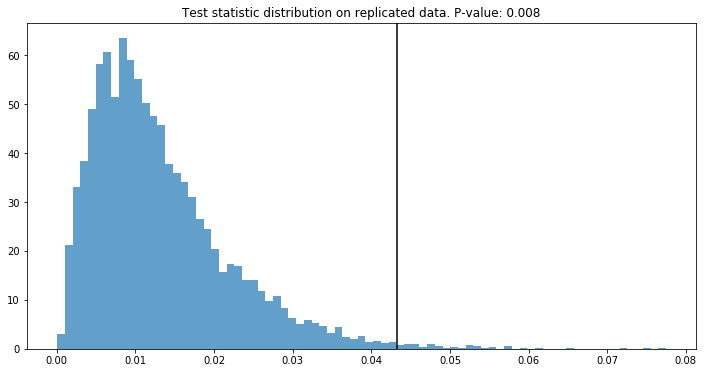

In [23]:
"""
The test statistic returns the average improvment rate
for each of the trails conducted.
"""

def test_stats(inout):
    return np.var([inout[i] / control_tot[i] 
                   for i in range(6)])

"""
Sampling from a binomial distribution with i as the replicated 
improvement rate from the posterior of the control group.
"""
replica_stats = []
for i in control_posterior:
    replica_stats.append(test_stats(
        [sts.binom.rvs(control_tot[_], i) 
         for _ in range(6)]))


# Improvment rate of the real control data 
real_stats = test_stats(control_imp)


plt.figure(figsize=(12, 6))
plt.hist(replica_stats, bins='auto', density=True, alpha= .7)
plt.axvline(real_stats, color='black')
plt.title('Test statistic distribution on replicated data. P-value: %.3f' % 
         (np.mean(np.array(replica_stats) > real_stats)))
plt.show()

#### Appendix
- **#sampling:** In order to put the posterior predictive of the control group into test, sampling method was applied to create an array of duplicate based on the parameters of the posterior. Furthermore, the duplicates estimation then were turned into an array that represent the number of improved subjects for each of the six clinical trials.
- **#descriptivestats:** creating a test statistic for model check based on the variance in the improvment rate for the patients in the control group of the medical trials. The stat highlights how the postrior of the control group doesn't consider the real statistic to be typical illustrated by a p-value of less than 1%